In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

# Loading Libraries & Data

The data we will be using is Weekly U.S. Gasoline and Diesel Retail Prices (Dollars per Gallon) from Jan 02, 1995-Mar 20, 2023 found at https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_w.html

In [2]:
data = pd.read_csv("../input/us-gas-prices/U.S. Gasoline and Diesel Retail Prices.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1473 non-null   object 
 1   All Grades All Formulations  1473 non-null   float64
 2   All Grades Conventional      1473 non-null   float64
 3   All Grades Reformulated      1473 non-null   float64
 4   Regular All Formulations)    1473 non-null   float64
 5   Regular Conventional         1473 non-null   float64
 6   Regular Reformulated         1473 non-null   float64
 7   Midgrade All Formulations    1473 non-null   float64
 8   Midgrade Conventional        1473 non-null   float64
 9   Midgrade Reformulated        1473 non-null   float64
 10  Premium All Formulations     1473 non-null   float64
 11  Premium Conventional         1473 non-null   float64
 12  Premium Reformulated         1473 non-null   float64
 13  No 2 Diesel       

# Data Cleaning

In [26]:
data.head()

,Date,All Grades All Formulations,All Grades Conventional,All Grades Reformulated,Regular All Formulations),Regular Conventional,Regular Reformulated,Midgrade All Formulations,Midgrade Conventional,Midgrade Reformulated,Premium All Formulations,Premium Conventional,Premium Reformulated,No 2 Diesel,Unnamed: 14
0,"Jan 02, 1995",1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,NaN
1,"Jan 09, 1995",1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,NaN
2,"Jan 16, 1995",1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,NaN
3,"Jan 23, 1995",1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,NaN
4,"Jan 30, 1995",1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,NaN


In [27]:
data.tail()

,Date,All Grades All Formulations,All Grades Conventional,All Grades Reformulated,Regular All Formulations),Regular Conventional,Regular Reformulated,Midgrade All Formulations,Midgrade Conventional,Midgrade Reformulated,Premium All Formulations,Premium Conventional,Premium Reformulated,No 2 Diesel,Unnamed: 14
1469,"Feb 27, 2023",3.457,3.338,3.694,3.342,3.250,3.540,3.874,3.707,4.124,4.189,4.034,4.374,4.294,NaN
1470,"Mar 06, 2023",3.505,3.374,3.767,3.389,3.288,3.610,3.916,3.724,4.205,4.239,4.055,4.461,4.282,NaN
1471,"Mar 13, 2023",3.568,3.434,3.838,3.456,3.350,3.688,3.970,3.778,4.262,4.284,4.105,4.499,4.247,NaN
1472,"Mar 20, 2023",3.534,3.405,3.794,3.422,3.321,3.644,3.935,3.749,4.215,4.247,4.075,4.454,4.185,NaN
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon first look we will need to reformat the date and remove Nan entries. We  Our data is sampled weekly (every 7 days)

In [28]:
#delete Unnamed Columns
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

#drop last row which is NaN 
data=data.drop(1473)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1472
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1473 non-null   object 
 1   All Grades All Formulations  1473 non-null   float64
 2   All Grades Conventional      1473 non-null   float64
 3   All Grades Reformulated      1473 non-null   float64
 4   Regular All Formulations)    1473 non-null   float64
 5   Regular Conventional         1473 non-null   float64
 6   Regular Reformulated         1473 non-null   float64
 7   Midgrade All Formulations    1473 non-null   float64
 8   Midgrade Conventional        1473 non-null   float64
 9   Midgrade Reformulated        1473 non-null   float64
 10  Premium All Formulations     1473 non-null   float64
 11  Premium Conventional         1473 non-null   float64
 12  Premium Reformulated         1473 non-null   float64
 13  No 2 Diesel       

In [29]:
from datetime import datetime

# input date in "Month Day, Year" format
# convert date to datatime datatype
data['Date'] = pd.to_datetime(data.Date)
data= data.set_index('Date')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1473 entries, 1995-01-02 to 2023-03-20
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   All Grades All Formulations  1473 non-null   float64
 1   All Grades Conventional      1473 non-null   float64
 2   All Grades Reformulated      1473 non-null   float64
 3   Regular All Formulations)    1473 non-null   float64
 4   Regular Conventional         1473 non-null   float64
 5   Regular Reformulated         1473 non-null   float64
 6   Midgrade All Formulations    1473 non-null   float64
 7   Midgrade Conventional        1473 non-null   float64
 8   Midgrade Reformulated        1473 non-null   float64
 9   Premium All Formulations     1473 non-null   float64
 10  Premium Conventional         1473 non-null   float64
 11  Premium Reformulated         1473 non-null   float64
 12  No 2 Diesel                  1473 non-null   float64
dtype

In [31]:
data.head()

,All Grades All Formulations,All Grades Conventional,All Grades Reformulated,Regular All Formulations),Regular Conventional,Regular Reformulated,Midgrade All Formulations,Midgrade Conventional,Midgrade Reformulated,Premium All Formulations,Premium Conventional,Premium Reformulated,No 2 Diesel
Date,,,,,,,,,,,,,
1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


Looks much better.

Now lastly, lets just focus on predicting the price for one type of gas. We will create a new dataframe with just the "All Grades All Formulations" data

In [32]:
data= data[['All Grades All Formulations']]

# Data Visualization and Analysis

Now we have time series data for 'All Grades All Formulations' indexed by DateTime index. 


Next steps for cleaning/transforming before modeling and prediction step:

1. Time Series data should be stationary because it is easier for statistical models to predict effectively and precisely.
    - A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components. Once the seasonality and trend are removed, the series will be strictly stationary
    
    - to check for stationary we will graph and run statistical tests


<AxesSubplot:xlabel='Date'>

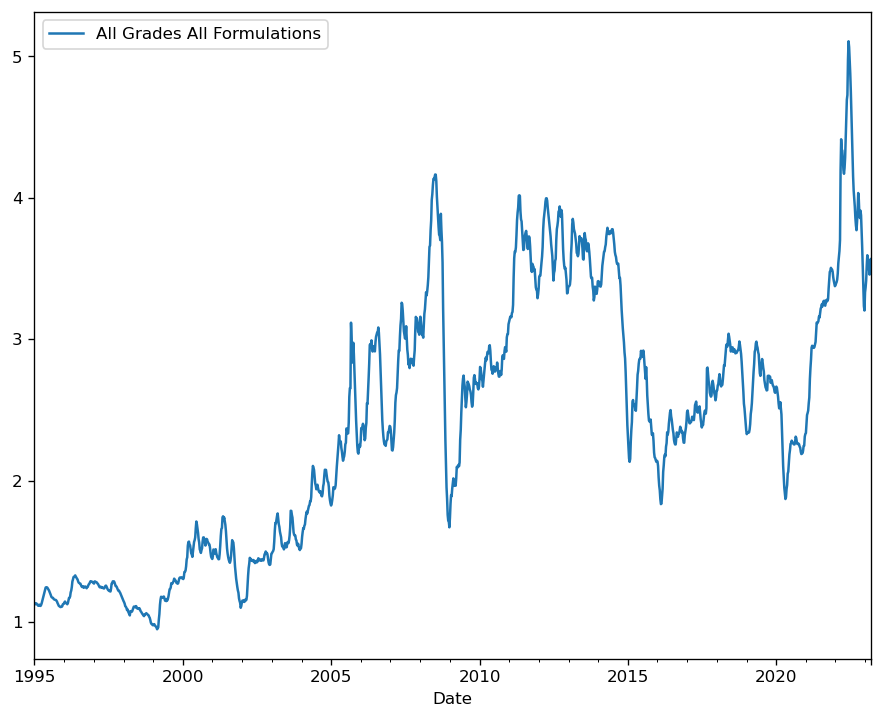

In [33]:
data.plot(kind='line')

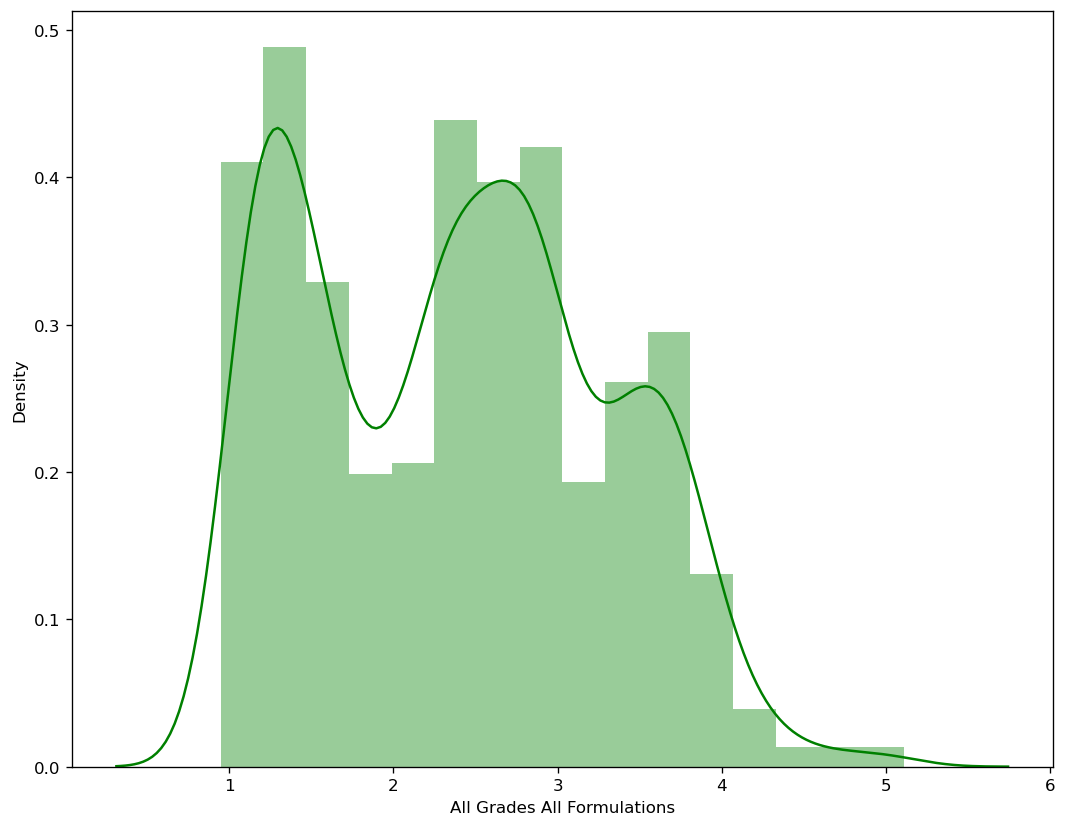

In [34]:
sb.distplot(data["All Grades All Formulations"],color='green')
plt.tight_layout()
plt.show()

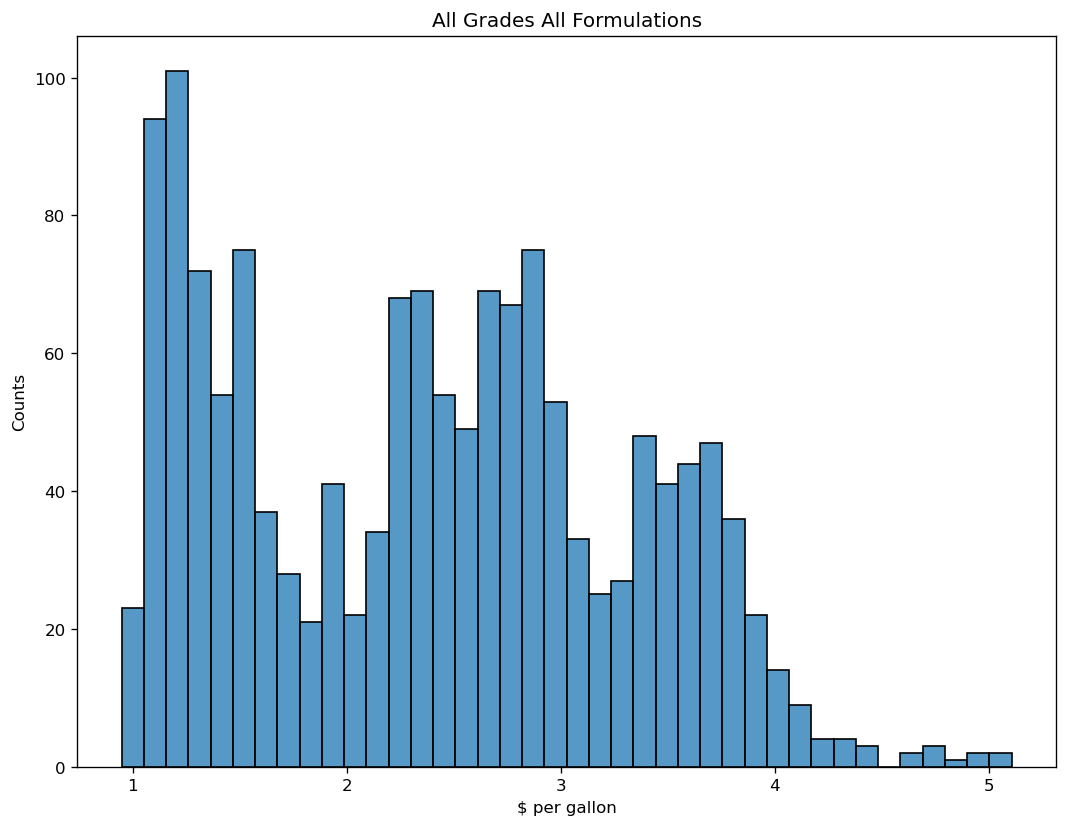

In [35]:
sb.histplot(data=data, x=data["All Grades All Formulations"], bins=40).set(title="All Grades All Formulations",xlabel="$ per gallon", ylabel="Counts")
plt.tight_layout()
plt.show()

The data does not appear normally distributed. This gives us reason to believe that the data is NOT stationary. 

Lets perform statistical tests to check

### Augmented Dickey-Fuller (ADF) Test or Unit Root Test for checking stationarity. 

- Null Hypothesis (H0): Series is non-stationary
- Alternate Hypothesis (HA): Series is stationary

Evaluation: 
- If p-value >0.05 (alpha): Fail to reject (H0) --> must convert our non-stationary data to stationary for effective time series modeling 
- If p-value <= 0.05 (alpha) Accept (H1) --> conclude that the dataset is stationary and no further transformation needed 


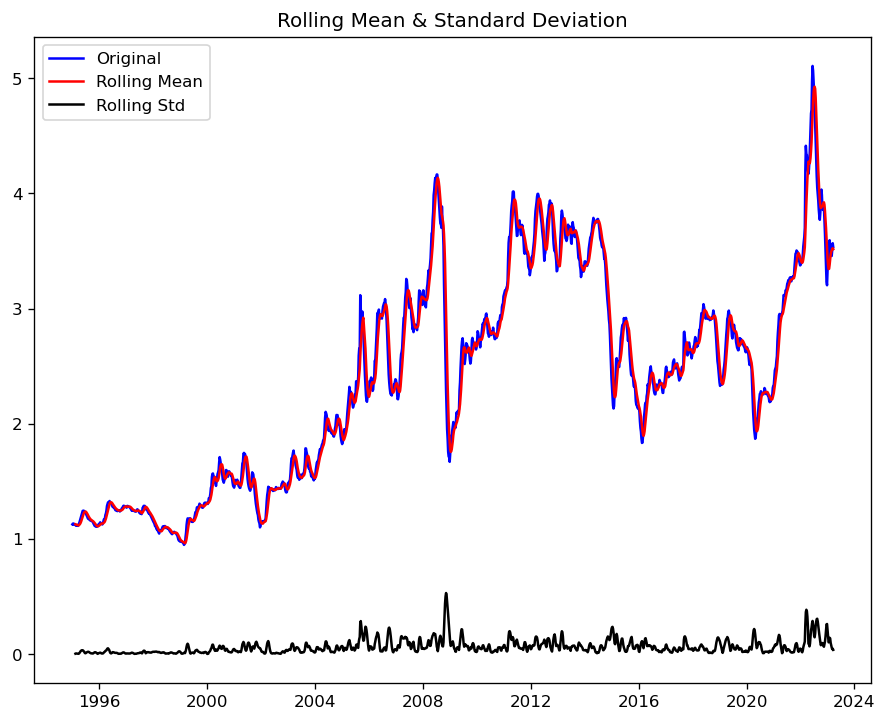

Results of Dickey-Fuller Test:
Test Statistic                   -2.503070
p-value                           0.114729
#Lags Used                        3.000000
Number of Observations Used    1469.000000
Critical Value (1%)              -3.434809
Critical Value (5%)              -2.863510
Critical Value (10%)             -2.567819
dtype: float64


In [36]:
#adapted from https://www.kaggle.com/code/lsubirats/time-series-forecasting

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=7,center=False).mean()
    rolstd = timeseries.rolling(window=7,center=False).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(data)

We see p-value= 0.114729 >0.05 (alpha) so we fail to reject (H0)and must convert our non-stationary data to stationary for effective time series modeling

How to make time series stationary?
You can make a non-stationary dataset to stationary by :
- (i)Differencing: taking its difference, where from each value in the time series data we subtract the previous value. In python we can do this by using df.diff() method. In some dataset taking the difference once is enough is to make it stationary. But some in cases, we need to take difference more than once.
- (ii) take the log of the time series, using np.log(df)
- (iii) take the square root of the time series, np.sqrt(df)
- (iv) take the proportional change, by using df.shift(1)/df

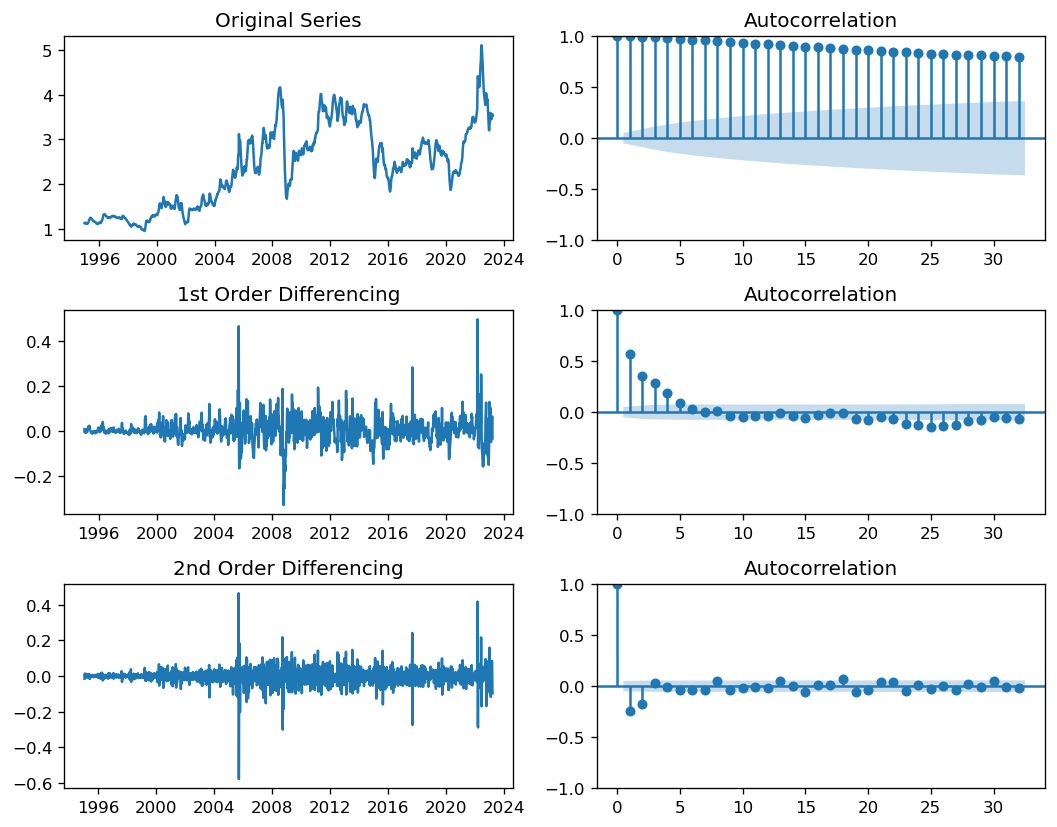

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = data
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
diff1= df.diff().dropna()
axes[1, 0].plot(diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1, ax=axes[1, 1])

# 2nd Differencing
diff2=df.diff().diff().dropna()
axes[2, 0].plot(diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2, ax=axes[2, 1])

plt.tight_layout()
plt.show()

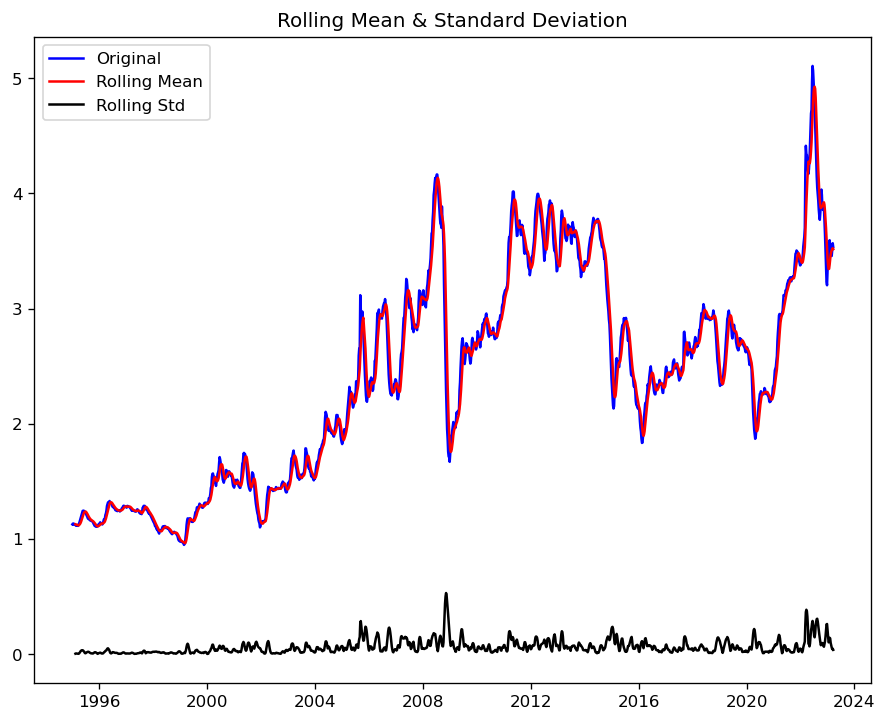

Results of Dickey-Fuller Test:
Test Statistic                   -2.503070
p-value                           0.114729
#Lags Used                        3.000000
Number of Observations Used    1469.000000
Critical Value (1%)              -3.434809
Critical Value (5%)              -2.863510
Critical Value (10%)             -2.567819
dtype: float64


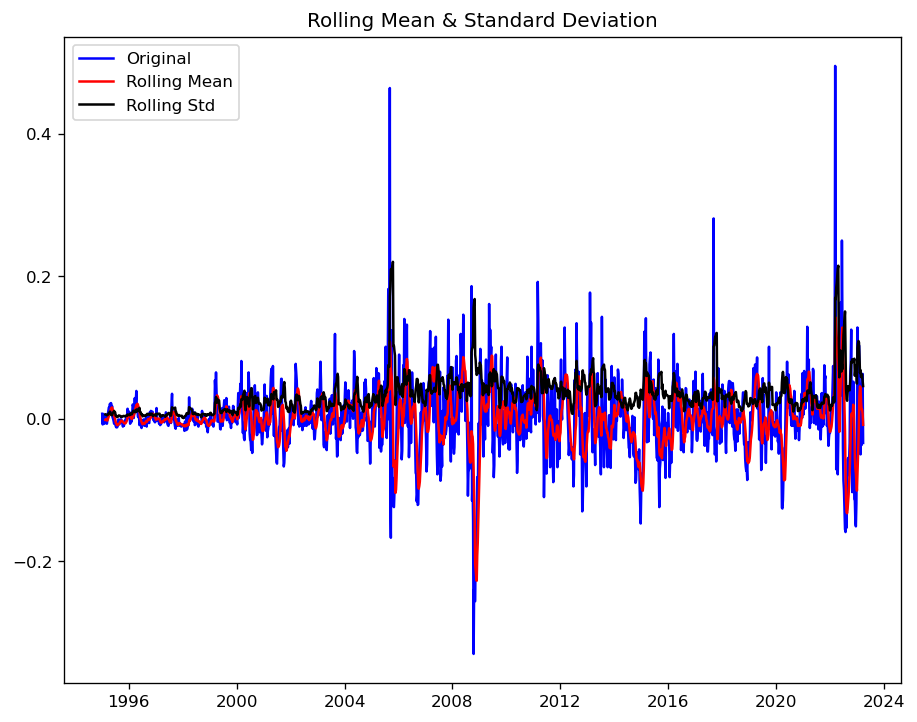

Results of Dickey-Fuller Test:
Test Statistic                -9.511368e+00
p-value                        3.242703e-16
#Lags Used                     2.400000e+01
Number of Observations Used    1.447000e+03
Critical Value (1%)           -3.434877e+00
Critical Value (5%)           -2.863539e+00
Critical Value (10%)          -2.567835e+00
dtype: float64


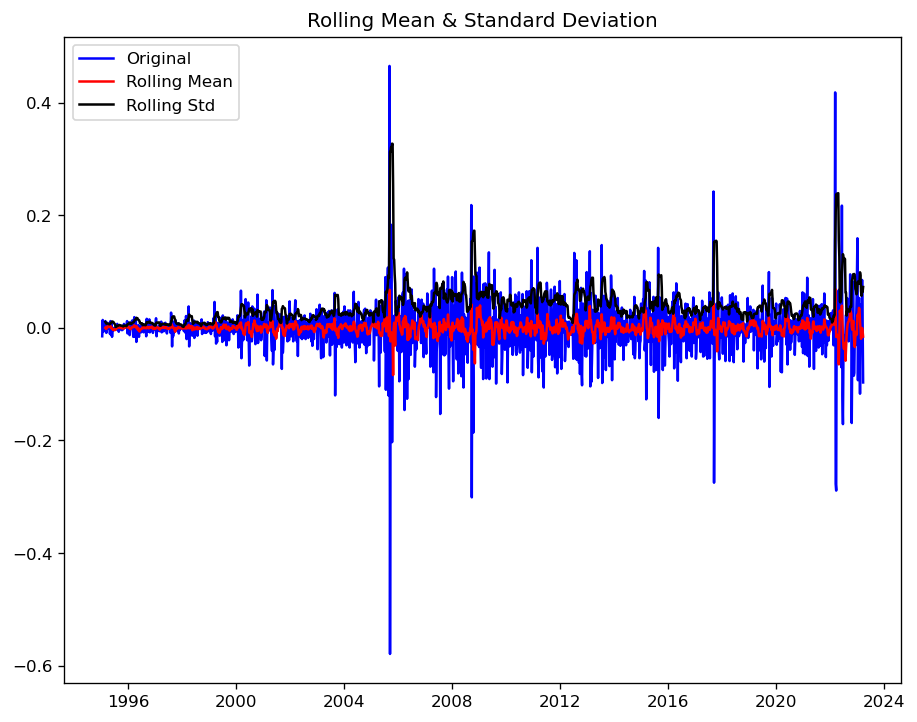

Results of Dickey-Fuller Test:
Test Statistic                -1.321034e+01
p-value                        1.050175e-24
#Lags Used                     1.900000e+01
Number of Observations Used    1.451000e+03
Critical Value (1%)           -3.434865e+00
Critical Value (5%)           -2.863534e+00
Critical Value (10%)          -2.567832e+00
dtype: float64


In [38]:

test_stationarity(df)
test_stationarity(diff1)

test_stationarity(diff2)

After the ADF test, we see the data reaches stationarity after just 1 order of differencing. So we can fix the order of differencing at d=1

### Find the order of the AR term (p) and MA term (q)
Next we check if the model needs any AR or MA terms, this will be the p and q term: 


Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

We do the same to find the order of MA term in the ACF plot. 


To do this we will plot Autocorrelation (ACF) and Partial Autocorrelation (PACF) to find the number of lags

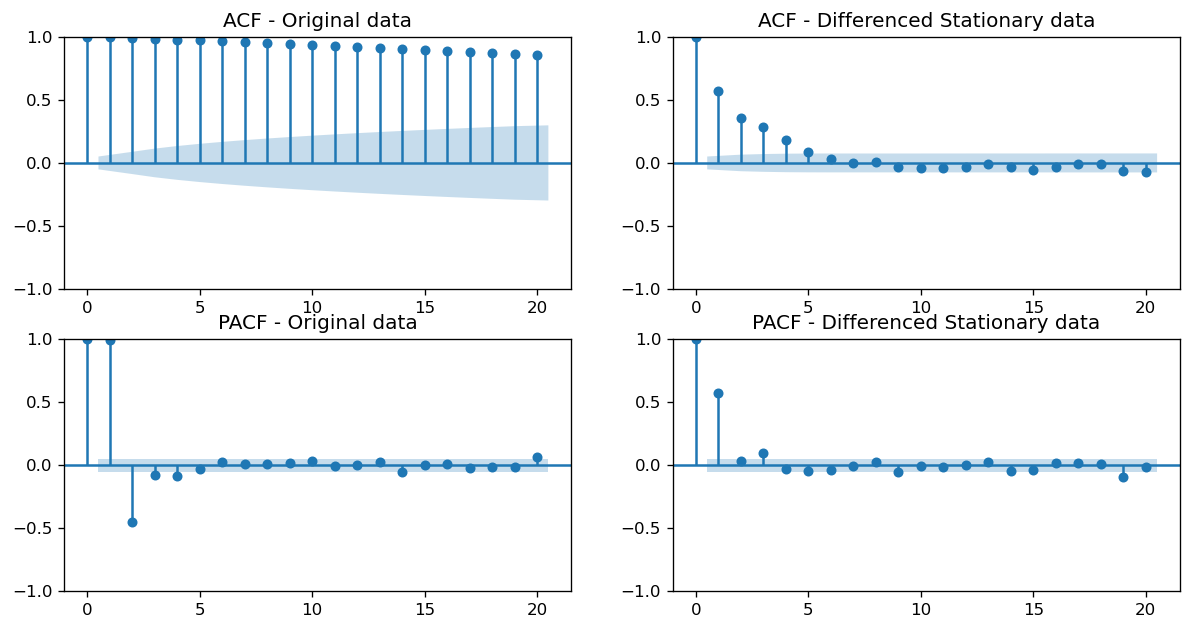

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
ax[0, 0] = plot_acf(data, ax=ax[0, 0], lags=20, title="ACF - Original data")
ax[1, 0] = plot_pacf(data, ax=ax[1, 0], lags=20, title="PACF - Original data")
ax[0, 1] = plot_acf(diff1 , ax=ax[0, 1], lags=20, title="ACF - Differenced Stationary data")
ax[1, 1] = plot_pacf(diff1, ax=ax[1, 1], lags=20, title="PACF - Differenced Stationary data")


Lags from ACF= 5 q=5 

Lags observed on PACF= 2 so p=2

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(diff1, order=(2,1,5)) #p,d,q
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:     All Grades All Formulations   No. Observations:                 1472
Model:                          ARIMA(2, 1, 5)   Log Likelihood                2537.171
Date:                         Wed, 26 Apr 2023   AIC                          -5058.341
Time:                                 01:35:20   BIC                          -5015.992
Sample:                             01-09-1995   HQIC                         -5042.549
                                  - 03-20-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2929      0.084     -3.504      0.000      -0.457      -0.129
ar.L2          0.5383      0.085      6.349      0.000     

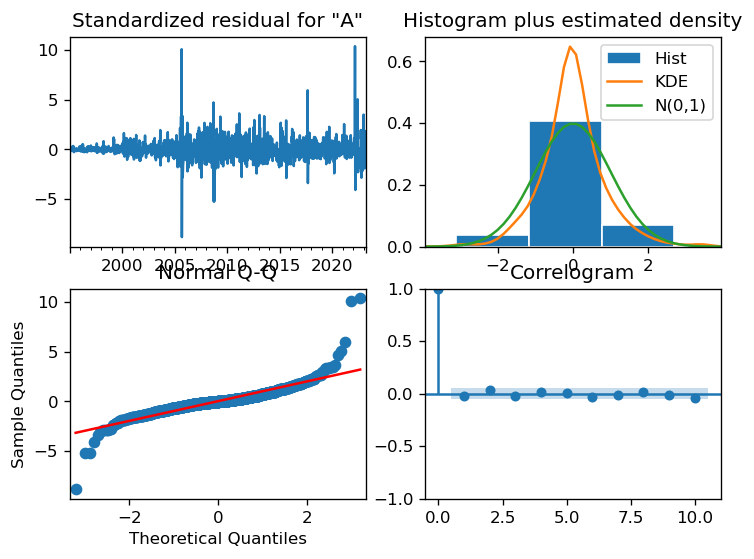

In [48]:
model_fit.plot_diagnostics(figsize=(7,5))
plt.show()

I am confused bc AIC is really bad 

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(0,2):
    for j in range(0,2):
        model=ARIMA(data["All Grades All Formulations"],order=(i,1,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

AIC :-4477.273890674351, Order Of AR: 0, Order of MA:0 
AIC :-4931.268392298699, Order Of AR: 0, Order of MA:1 
AIC :-5063.365560730621, Order Of AR: 1, Order of MA:0 
AIC :-5064.0835019252445, Order Of AR: 1, Order of MA:1 


## Model for 'All Grades All Formulations'

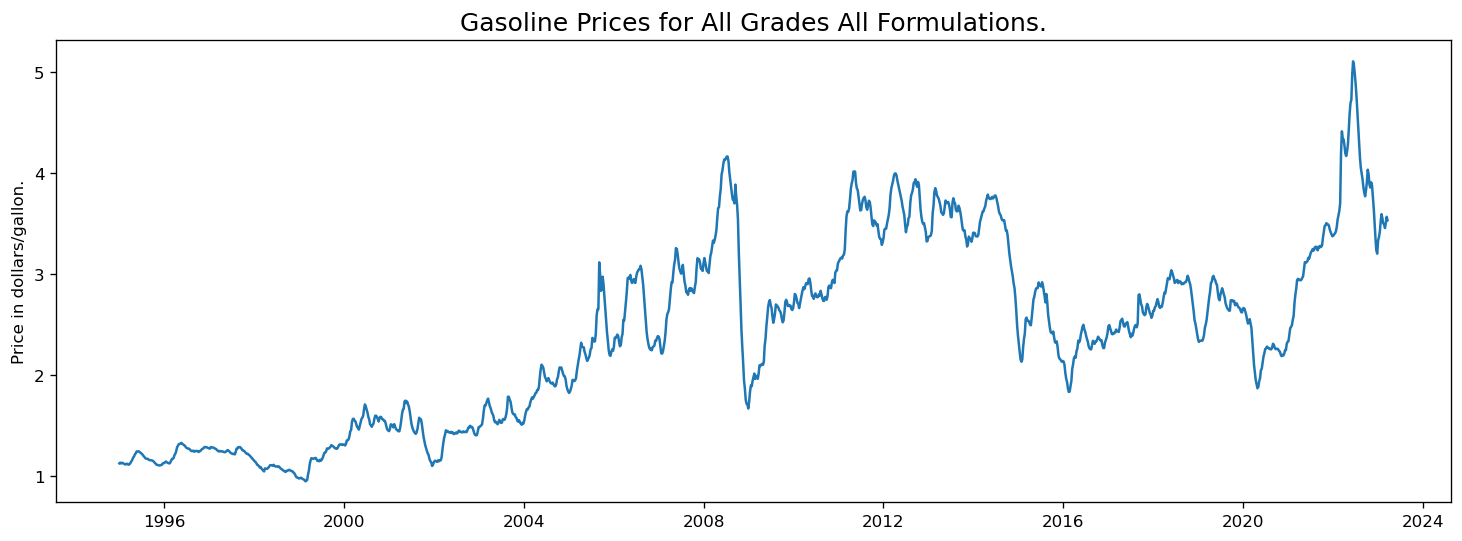

In [42]:

plt.figure(figsize=(15,5))
plt.plot(data['All Grades All Formulations'])
plt.title('Gasoline Prices for All Grades All Formulations.', fontsize=15)
plt.ylabel('Price in dollars/gallon.')
plt.show()

### Split data for training and testing
- Ratio for training and testing data is 80:20

In [43]:
from sklearn.model_selection import train_test_split
# split into train test sets
train_data, test_data = train_test_split(data, test_size=0.20)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1178, 1)
test_data:  (295, 1)


In [44]:
##another way without the library 

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1178, 1)
test_data:  (295, 1)


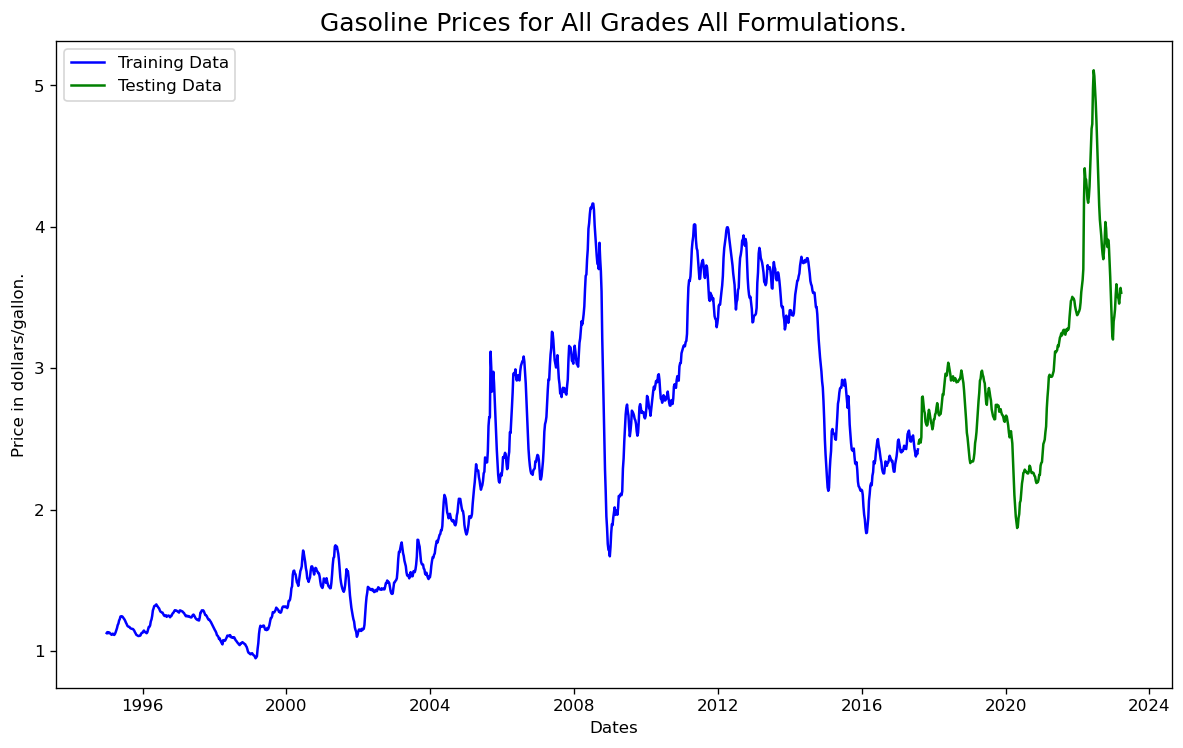

In [45]:
plt.figure(figsize=(12,7))
plt.title('Gasoline Prices for All Grades All Formulations.', fontsize=15)
plt.ylabel('Price in dollars/gallon.')
plt.xlabel('Dates')
plt.plot(train_data['All Grades All Formulations'], 'blue', label='Training Data')
plt.plot(test_data['All Grades All Formulations'], 'green', label='Testing Data')
plt.legend()

## Normalization
Scale down price to range (0,1) and normalize the data

IDK If we need this

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_data_scaled = scaler.fit_transform((train_data))
print(train_data_scaled)
print(train_data_scaled.shape)

[[0.05534826]
 [0.05752488]
 [0.05503731]
 ...
 [0.45460199]
 [0.44869403]
 [0.45926617]]
(1178, 1)
